In [188]:
import pandas as pd
import seaborn as sns
import matplotlib as plt 
import numpy as np 
import statsmodels.api as sma 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [189]:
df = pd.read_csv('medical_cost.csv')

In [190]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [191]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


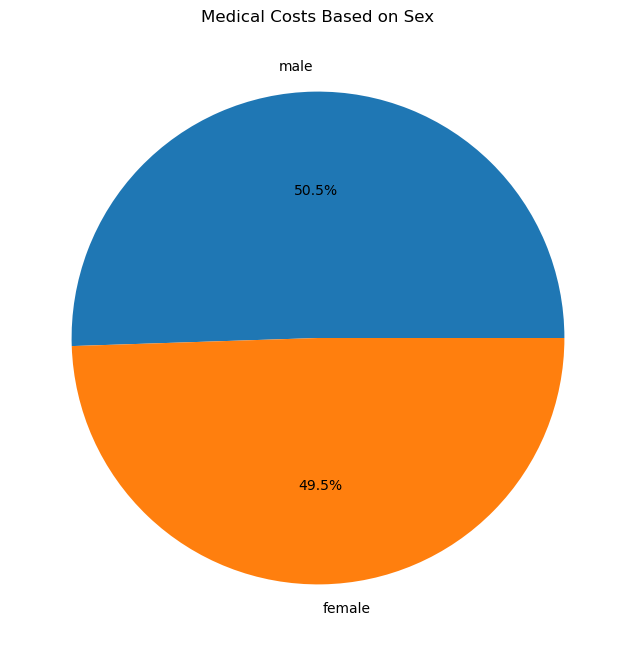

In [196]:
# Pie Chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Medical Costs Based on Sex')
plt.ylabel('')
plt.show()

In [197]:
df.dropna(inplace = True)
df.dtypes

Id            int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [198]:
columns_to_convert = ['sex', 'smoker', 'region']

In [199]:
for column in columns_to_convert:
    df[column] = df[column].astype('category').cat.codes

In [200]:
df.dtypes

Id            int64
age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region         int8
charges     float64
dtype: object

In [201]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,1,3,16884.92400
1,2,18,1,33.770,1,0,2,1725.55230
2,3,28,1,33.000,3,0,2,4449.46200
3,4,33,1,22.705,0,0,1,21984.47061
4,5,32,1,28.880,0,0,1,3866.85520


In [202]:
df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [203]:
X = df.drop(columns=["bmi", "charges"])
y = df["charges"]

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

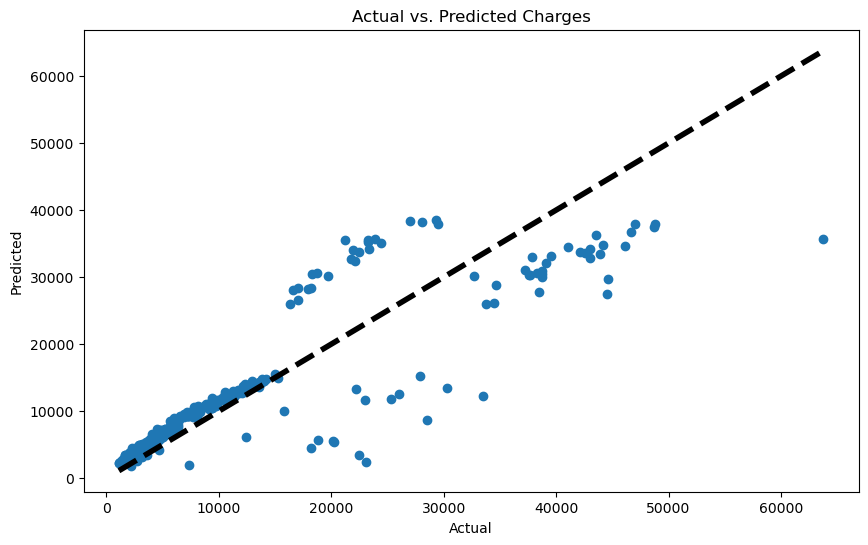

In [206]:
y_pred = linear_model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Charges")
plt.show()

In [207]:
df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [208]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absoulute Error (MAE): {mae}")
print(f"Mean Squared Root (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (r2): {r2}")

Mean Absoulute Error (MAE): 3946.432283569844
Mean Squared Root (MSE): 37805502.15119029
Root Mean Squared Error (RMSE): 6148.617905772832
R^2 Score (r2): 0.7564843088383394


In [46]:
#Experiment 2

In [73]:
columns_to_convert = ['sex', 'smoker', 'region', 'bmi', 'charges']
for column in columns_to_convert:
    df[column] = df[column].astype('category').cat.codes
df.dtypes

Id          int64
age         int64
sex          int8
bmi         int16
children    int64
smoker       int8
region       int8
charges     int16
dtype: object

In [48]:
df.drop('region', axis=1, inplace=True)
X = df.drop('charges', axis=1)

In [49]:
y = df['charges']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

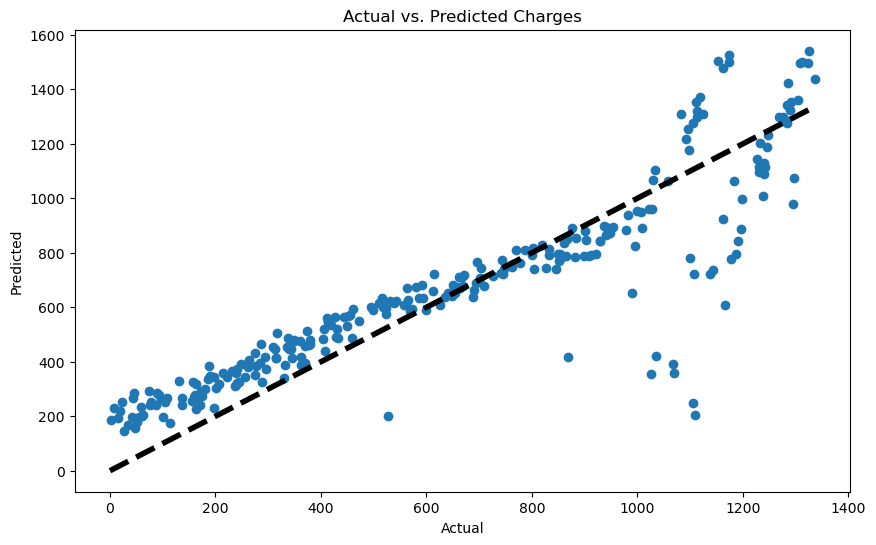

In [52]:
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Charges")
plt.show()

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absoulute Error (MAE): {mae}")
print(f"Mean Squared Root (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (r2): {r2}")

Mean Absoulute Error (MAE): 127.82574152097395
Mean Squared Root (MSE): 33179.55722123906
Root Mean Squared Error (RMSE): 182.15256578274997
R^2 Score (r2): 0.7898988385921176


In [54]:
df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [61]:
#Experiment 3

In [172]:
columns_to_convert = ['sex', 'smoker', 'region', 'bmi', 'charges']
for column in columns_to_convert:
    df[column] = df[column].astype('category').cat.codes
df.dtypes

df.drop(['region','Id'], axis=1, inplace=True)
X = df.drop('charges', axis=1)

In [173]:
y = df['charges']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

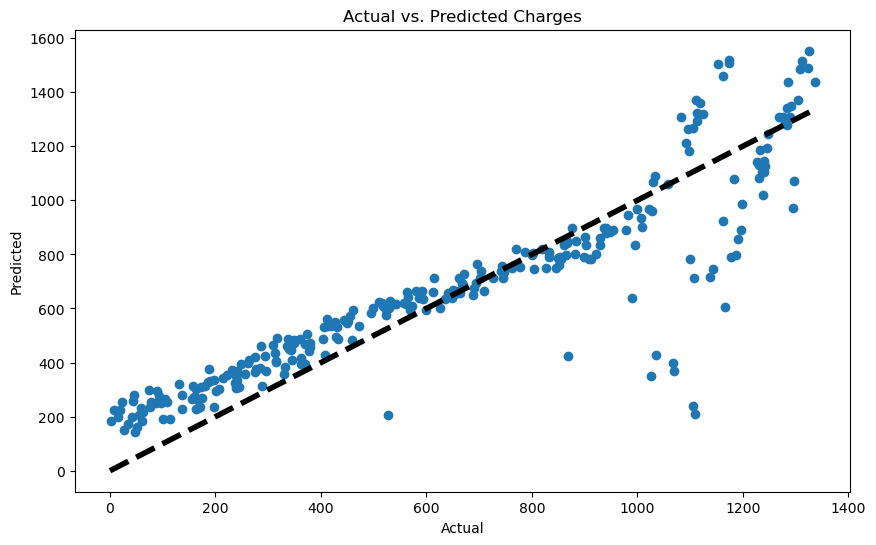

In [176]:
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Charges")
plt.show()

In [177]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absoulute Error (MAE): {mae}")
print(f"Mean Squared Root (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (r2): {r2}")

Mean Absoulute Error (MAE): 126.96566781292024
Mean Squared Root (MSE): 32888.97765508503
Root Mean Squared Error (RMSE): 181.3531848495775
R^2 Score (r2): 0.7917388602633918
